In [279]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import  layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [280]:
data = np.load('cifar-10.npz')

train_images = data['x_train']
train_labels = data['y_train']
test_images = data['x_test']
test_labels = data['y_test']

In [281]:
unique_labels = np.unique(train_labels)
print("Unique train labels:", np.unique(train_labels))

Unique train labels: [0 1 2 3 4 5 6 7 8 9]


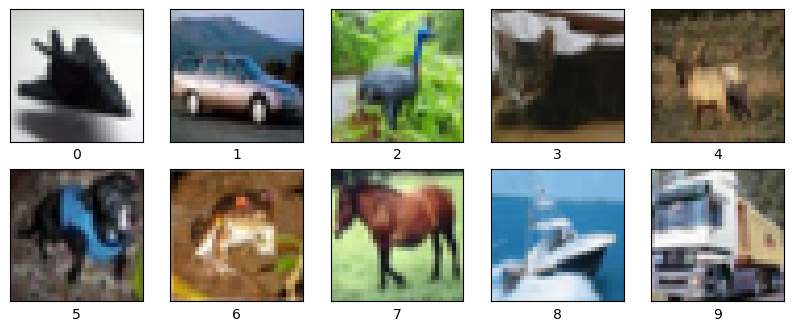

In [282]:
plt.figure(figsize=(10, 10))
for i in range(len(unique_labels)):  # In case there are fewer than 10 unique labels
    label = unique_labels[i]
    idx = np.where(train_labels == label)[0][0]  # Get the index of the first occurrence of this label
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[idx])  # Display image corresponding to this unique label
    plt.xlabel(label) 
plt.show()

In [283]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [284]:
y_train_cat = to_categorical(train_labels, 10)
y_test_cat  = to_categorical(test_labels, 10)

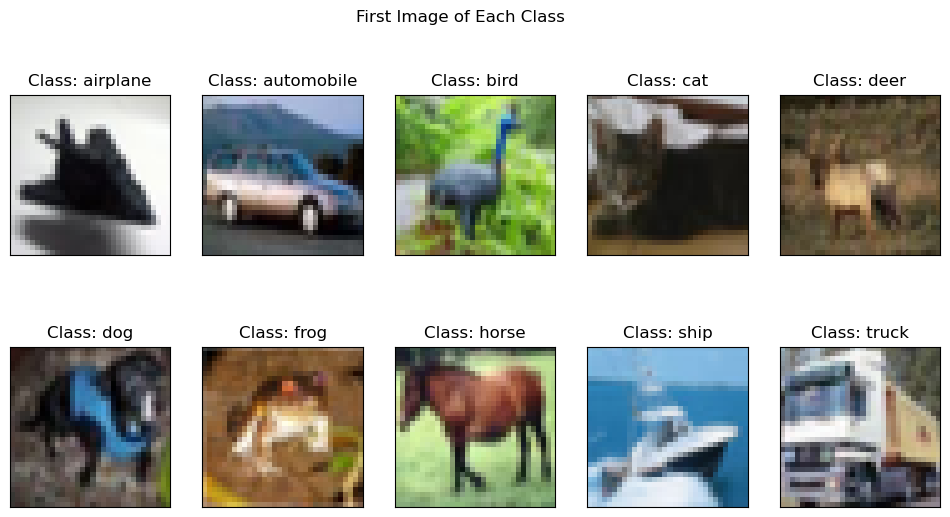

In [285]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 6))
plt.suptitle('First Image of Each Class')

for i, label in enumerate(unique_labels):
    index = np.where(train_labels == label)[0][0]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[index]) 
    plt.title(f"Class: {class_names[label]}")
    plt.xticks([])
    plt.yticks([])
plt.show() 

In [286]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\amana\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [287]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [288]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [289]:
max_epochs = 15
early_stop = EarlyStopping(
    monitor='val_loss',  
    patience=3, 
    restore_best_weights=True
)

history = model.fit(train_images, y_train_cat,
    validation_data=(test_images, y_test_cat),
    epochs=max_epochs, 
    callbacks=[early_stop]
)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.4866 - loss: 1.4453 - val_accuracy: 0.4765 - val_loss: 1.5942
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6228 - loss: 1.0716 - val_accuracy: 0.5942 - val_loss: 1.1565
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6726 - loss: 0.9320 - val_accuracy: 0.5904 - val_loss: 1.2024
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.7017 - loss: 0.8467 - val_accuracy: 0.6708 - val_loss: 0.9416
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.7244 - loss: 0.7791 - val_accuracy: 0.6634 - val_loss: 0.9714
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7408 - loss: 0.7343 - val_accuracy: 0.6874 - val_loss: 0.9360
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7561 - loss: 0.6943 - val_accuracy: 0.7053 - val_loss: 0.8777
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7674 -

In [290]:
train_loss,train_acc = model.evaluate(train_images,y_train_cat)
print("loss %.3f"%train_loss)
print("acc %.3f"%train_acc)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8687 - loss: 0.3752
loss 0.375
acc 0.869


In [291]:
test_loss,test_acc = model.evaluate(test_images,y_test_cat)
print("loss %.3f"%test_loss)
print("acc %.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7366 - loss: 0.8066
loss 0.807
acc 0.737


Text(0.5, 1.0, 'automobile')

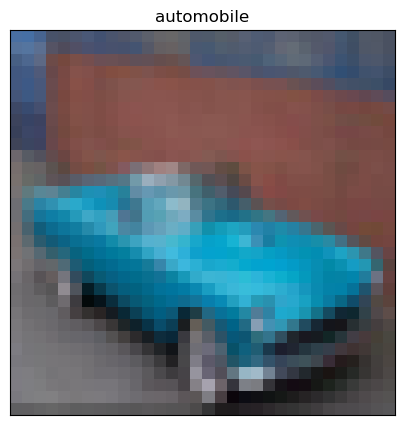

In [292]:
n = random.randint(0,9999)
plt.figure(figsize=(5,5))
plt.imshow(test_images[n])
plt.yticks([])
plt.xticks([])
plt.title(class_names[np.argmax(predicted_values[n])])

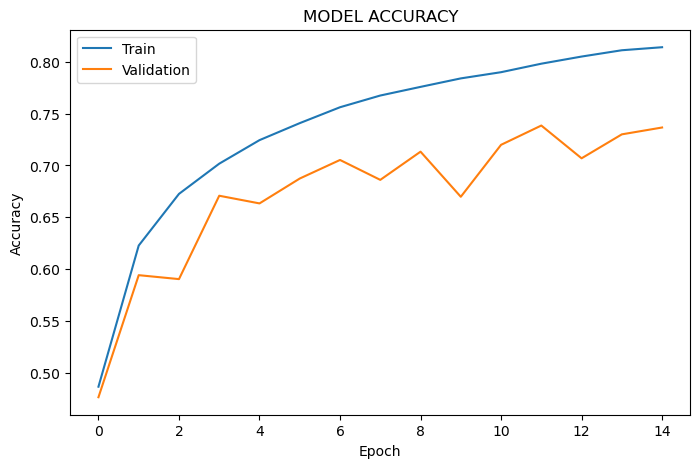

In [293]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()